In [5]:
# ================================================================
# Internet Speed & Latency Analysis - Advanced EDA Project
# Author: Nowshika Mirza. R
# ================================================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Config
DATA_FILE = "Internet_speed.csv"
SAMPLE_SIZE = 1000  # lightweight subset

# Load Dataset
try:
    df = pd.read_csv(DATA_FILE, nrows=SAMPLE_SIZE)
    print(f"✅ Data Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print(f"❌ File '{DATA_FILE}' not found.")
    df = pd.DataFrame()

if not df.empty:
    # Preview
    print("\n📊 First 5 Rows:")
    display(df.head())

    # ---------------------------
    # Basic Data Understanding
    # ---------------------------
    print("\n🔍 Checking Missing Values:")
    print(df.isnull().sum())

    print("\n📈 Descriptive Statistics:")
    display(df.describe())

    # Convert timestamps
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
        df = df.dropna(subset=['timestamp'])

    # ---------------------------
    # 1️⃣ Latency Distribution
    # ---------------------------
    if 'ping_latency' in df.columns:
        plt.figure(figsize=(10,5))
        sns.histplot(df['ping_latency'], bins=50, kde=True, color='royalblue')
        plt.title("Distribution of Ping Latency (ms)")
        plt.xlabel("Ping Latency (ms)")
        plt.ylabel("Frequency")
        plt.show()

        # Detect anomalies using z-score
        z_scores = np.abs(stats.zscore(df['ping_latency'].dropna()))
        anomaly_count = np.sum(z_scores > 3)
        print(f"🚨 Anomalous latency records detected: {anomaly_count}")

    # ---------------------------
    # 2️⃣ Speed Relationships
    # ---------------------------
    if {'download_speed', 'upload_speed'}.issubset(df.columns):
        plt.figure(figsize=(8,6))
        sns.scatterplot(
            data=df, x='download_speed', y='upload_speed',
            hue='ping_latency' if 'ping_latency' in df.columns else None,
            palette='coolwarm', alpha=0.7
        )
        plt.title("Download vs Upload Speed (colored by Ping Latency)")
        plt.xlabel("Download Speed (Mbps)")
        plt.ylabel("Upload Speed (Mbps)")
        plt.legend(title="Ping Latency", loc='upper left')
        plt.show()

    # ---------------------------
    # 3️⃣ Boxplots for Outlier Detection
    # ---------------------------
    for col in ['ping_latency', 'download_speed', 'upload_speed']:
        if col in df.columns:
            plt.figure(figsize=(8,3))
            sns.boxplot(x=df[col], color='lightcoral')
            plt.title(f"Boxplot - {col.replace('_',' ').title()}")
            plt.show()

    # ---------------------------
    # 4️⃣ Correlation Heatmap
    # ---------------------------
    num_cols = ['ping_latency', 'download_speed', 'upload_speed']
    num_cols = [col for col in num_cols if col in df.columns]
    if len(num_cols) > 1:
        plt.figure(figsize=(6,5))
        corr = df[num_cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Between Latency and Speeds")
        plt.show()

    # ---------------------------
    # 5️⃣ Time Series Analysis
    # ---------------------------
    if 'timestamp' in df.columns and 'ping_latency' in df.columns:
        df = df.set_index('timestamp').sort_index()
        daily = df.resample('D').mean(numeric_only=True)
        plt.figure(figsize=(12,5))
        plt.plot(daily.index, daily['ping_latency'], color='purple')
        plt.title("Daily Average Ping Latency Over Time")
        plt.ylabel("Latency (ms)")
        plt.xlabel("Date")
        plt.show()

    # ---------------------------
    # 6️⃣ Country / Region Level Analysis
    # ---------------------------
    if 'country' in df.columns:
        country_stats = df.groupby('country')[['ping_latency', 'download_speed', 'upload_speed']].mean().sort_values('ping_latency')
        plt.figure(figsize=(10,6))
        sns.barplot(y=country_stats.index, x='ping_latency', data=country_stats, palette='viridis')
        plt.title("Average Ping Latency by Country")
        plt.xlabel("Ping Latency (ms)")
        plt.ylabel("Country")
        plt.show()

    # ---------------------------
    # 7️⃣ Summary Insights
    # ---------------------------
    print("\n🧾 --- Summary Insights ---")
    if 'ping_latency' in df.columns:
        print(f"• Average Ping Latency: {df['ping_latency'].mean():.2f} ms")
    if 'download_speed' in df.columns:
        print(f"• Average Download Speed: {df['download_speed'].mean():.2f} Mbps")
    if 'upload_speed' in df.columns:
        print(f"• Average Upload Speed: {df['upload_speed'].mean():.2f} Mbps")

    if len(num_cols) > 1:
        print(f"• Strongest Correlation: {corr.abs().unstack().sort_values(ascending=False).drop_duplicates().index[1]}")
else:
    print("No data loaded. Please ensure the dataset is available.")


✅ Data Loaded: 1000 rows, 13 columns

📊 First 5 Rows:


,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
0,21.854305,42.395374,19.934759,0.999340,7.569985,1.369483,7.467012,0.000000,0.0,0.000000,76.190258,2.552049,730.336287
1,47.782144,49.976388,17.979781,1.493494,2.660608,1.243015,6.215047,2.373401,0.0,3.869607,70.945684,2.788454,994.148168
2,37.939727,86.182002,10.455388,1.125334,4.119757,3.416768,9.751490,1.509861,0.0,2.332773,83.994324,3.098587,2551.867438
3,31.939632,37.300417,31.148800,0.166605,6.969526,4.864465,4.532849,0.000000,0.0,1.608198,92.278904,4.479742,621.336539
4,12.020839,87.616720,24.877960,0.371160,5.338804,3.010885,7.114995,1.241954,0.0,2.693502,80.535702,4.190802,2612.315499



🔍 Checking Missing Values:
Ping_latency             0
Download_speed           0
Upload_speed             0
Packet_loss_rate         0
Router_distance          0
Network_congestion       0
ISP_quality              0
Connection_type_DSL      0
Connection_type_Cable    0
Connection_type_Fiber    0
Signal_strength          0
Weather_conditions       0
Internet_speed           0
dtype: int64

📈 Descriptive Statistics:


,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.061545,52.354126,26.273204,0.981983,5.625912,3.004468,6.525844,1.299541,1.268114,1.266828,84.789222,2.550984,1284.376149
std,13.146181,27.473507,13.749744,0.581643,2.589878,1.129684,2.047478,1.651089,1.606164,1.609318,8.547181,1.451678,946.285206
min,5.208441,5.587463,2.045266,0.000619,1.022696,1.000779,3.000472,0.000000,0.000000,0.000000,70.001406,0.008109,118.387715
25%,15.618797,28.691100,14.126286,0.473725,3.523414,2.045081,4.713321,0.000000,0.000000,0.000000,77.526753,1.315016,438.396474
50%,27.356332,51.588267,26.305574,0.984687,5.574887,2.990689,6.533458,0.066400,0.114306,0.094424,84.846676,2.563880,1043.726424
75%,38.494381,75.285919,38.321703,1.493572,7.933092,3.967125,8.362631,2.627027,2.566090,2.591610,91.849298,3.847580,2002.517552
max,49.987295,99.938279,49.984314,1.999850,9.976101,4.993540,9.991714,4.991174,4.981787,4.998248,99.998191,4.990330,3354.763485



🧾 --- Summary Insights ---


✅ Data Loaded: 1000 rows, 13 columns

📊 First 5 rows:


,Ping_latency,Download_speed,Upload_speed,Packet_loss_rate,Router_distance,Network_congestion,ISP_quality,Connection_type_DSL,Connection_type_Cable,Connection_type_Fiber,Signal_strength,Weather_conditions,Internet_speed
0,21.854305,42.395374,19.934759,0.999340,7.569985,1.369483,7.467012,0.000000,0.0,0.000000,76.190258,2.552049,730.336287
1,47.782144,49.976388,17.979781,1.493494,2.660608,1.243015,6.215047,2.373401,0.0,3.869607,70.945684,2.788454,994.148168
2,37.939727,86.182002,10.455388,1.125334,4.119757,3.416768,9.751490,1.509861,0.0,2.332773,83.994324,3.098587,2551.867438
3,31.939632,37.300417,31.148800,0.166605,6.969526,4.864465,4.532849,0.000000,0.0,1.608198,92.278904,4.479742,621.336539
4,12.020839,87.616720,24.877960,0.371160,5.338804,3.010885,7.114995,1.241954,0.0,2.693502,80.535702,4.190802,2612.315499



✅ Detected Columns:
Ping latency: ping_latency
Download speed: download_speed
Upload speed: upload_speed

📈 Descriptive Statistics:


,ping_latency,download_speed,upload_speed,packet_loss_rate,router_distance,network_congestion,isp_quality,connection_type_dsl,connection_type_cable,connection_type_fiber,signal_strength,weather_conditions,internet_speed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.061545,52.354126,26.273204,0.981983,5.625912,3.004468,6.525844,1.299541,1.268114,1.266828,84.789222,2.550984,1284.376149
std,13.146181,27.473507,13.749744,0.581643,2.589878,1.129684,2.047478,1.651089,1.606164,1.609318,8.547181,1.451678,946.285206
min,5.208441,5.587463,2.045266,0.000619,1.022696,1.000779,3.000472,0.000000,0.000000,0.000000,70.001406,0.008109,118.387715
25%,15.618797,28.691100,14.126286,0.473725,3.523414,2.045081,4.713321,0.000000,0.000000,0.000000,77.526753,1.315016,438.396474
50%,27.356332,51.588267,26.305574,0.984687,5.574887,2.990689,6.533458,0.066400,0.114306,0.094424,84.846676,2.563880,1043.726424
75%,38.494381,75.285919,38.321703,1.493572,7.933092,3.967125,8.362631,2.627027,2.566090,2.591610,91.849298,3.847580,2002.517552
max,49.987295,99.938279,49.984314,1.999850,9.976101,4.993540,9.991714,4.991174,4.981787,4.998248,99.998191,4.990330,3354.763485


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


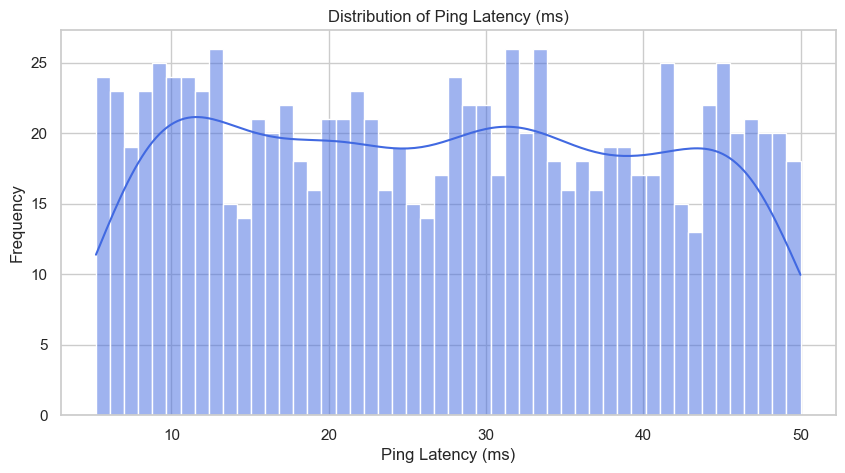

🚨 Outlier records (>3σ): 0


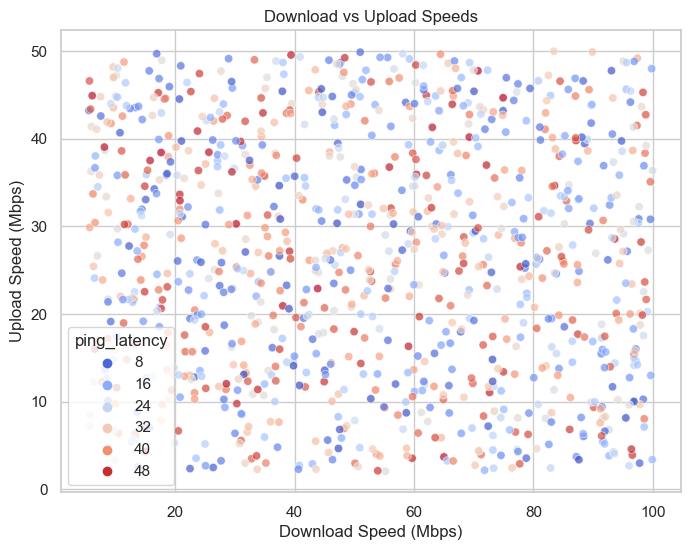

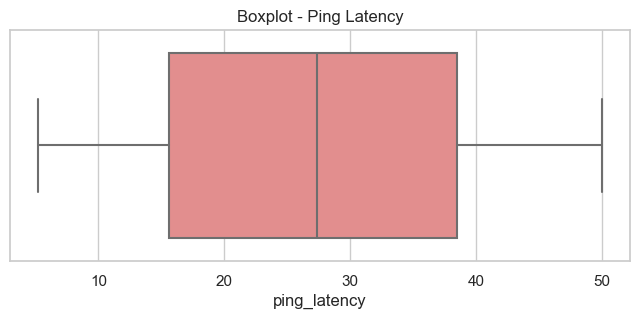

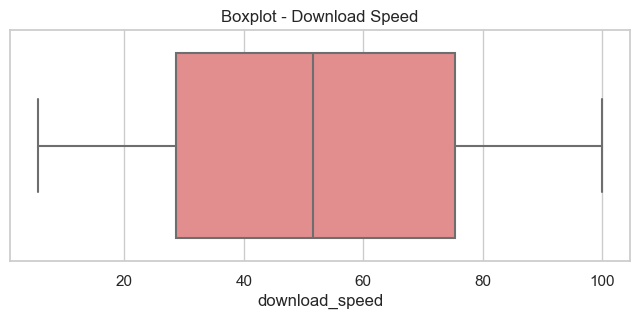

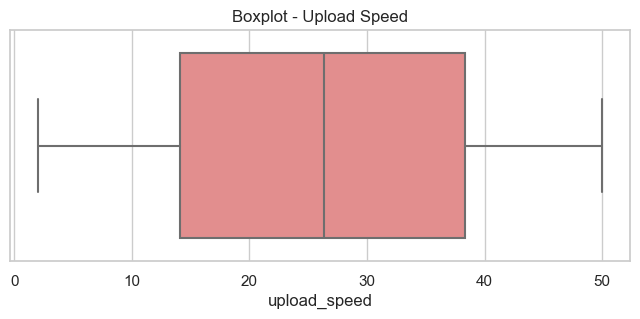

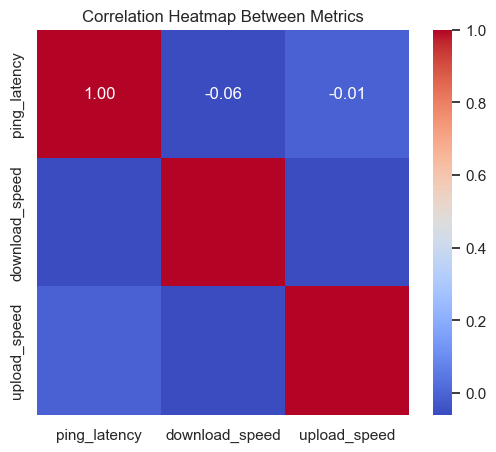


🧾 --- Summary ---
• Mean Ping Latency: 27.06 ms
• Mean Download Speed: 52.35 Mbps
• Mean Upload Speed: 26.27 Mbps


In [6]:
# ================================================================
# Internet Speed & Latency Analysis - Robust Version
# Author: Nowshika Mirza. R
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Config
DATA_FILE = "Internet_speed.csv"
SAMPLE_SIZE = 1000

# Load dataset
try:
    df = pd.read_csv(DATA_FILE, nrows=SAMPLE_SIZE)
    print(f"✅ Data Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print(f"❌ File '{DATA_FILE}' not found.")
    df = pd.DataFrame()

if not df.empty:
    print("\n📊 First 5 rows:")
    display(df.head())

    # Standardize column names (lowercase + remove spaces)
    df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

    # Guess possible column names for speeds & latency
    possible_ping = [c for c in df.columns if "ping" in c or "latency" in c]
    possible_download = [c for c in df.columns if "download" in c]
    possible_upload = [c for c in df.columns if "upload" in c]

    ping_col = possible_ping[0] if possible_ping else None
    download_col = possible_download[0] if possible_download else None
    upload_col = possible_upload[0] if possible_upload else None

    print(f"\n✅ Detected Columns:")
    print(f"Ping latency: {ping_col}")
    print(f"Download speed: {download_col}")
    print(f"Upload speed: {upload_col}")

    # Summary stats
    print("\n📈 Descriptive Statistics:")
    display(df.describe())

    # ==============================
    # 1️⃣ Latency Distribution
    # ==============================
    if ping_col:
        plt.figure(figsize=(10,5))
        sns.histplot(df[ping_col], bins=50, kde=True, color='royalblue')
        plt.title("Distribution of Ping Latency (ms)")
        plt.xlabel("Ping Latency (ms)")
        plt.ylabel("Frequency")
        plt.show()

        z_scores = np.abs(stats.zscore(df[ping_col].dropna()))
        print(f"🚨 Outlier records (>3σ): {np.sum(z_scores > 3)}")
    else:
        print("⚠️ No latency column found in dataset.")

    # ==============================
    # 2️⃣ Download vs Upload Speed
    # ==============================
    if download_col and upload_col:
        plt.figure(figsize=(8,6))
        sns.scatterplot(
            x=df[download_col], y=df[upload_col],
            hue=df[ping_col] if ping_col else None,
            palette="coolwarm", alpha=0.7
        )
        plt.title("Download vs Upload Speeds")
        plt.xlabel("Download Speed (Mbps)")
        plt.ylabel("Upload Speed (Mbps)")
        plt.show()

    # ==============================
    # 3️⃣ Boxplots for Outliers
    # ==============================
    for col in [ping_col, download_col, upload_col]:
        if col:
            plt.figure(figsize=(8,3))
            sns.boxplot(x=df[col], color='lightcoral')
            plt.title(f"Boxplot - {col.replace('_',' ').title()}")
            plt.show()

    # ==============================
    # 4️⃣ Correlation Heatmap
    # ==============================
    selected = [c for c in [ping_col, download_col, upload_col] if c]
    if len(selected) > 1:
        plt.figure(figsize=(6,5))
        sns.heatmap(df[selected].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap Between Metrics")
        plt.show()

    # ==============================
    # 5️⃣ Time-based Analysis
    # ==============================
    time_cols = [c for c in df.columns if "time" in c or "date" in c]
    if time_cols:
        df[time_cols[0]] = pd.to_datetime(df[time_cols[0]], errors='coerce')
        df = df.dropna(subset=[time_cols[0]])
        df = df.set_index(time_cols[0]).sort_index()

        if ping_col:
            plt.figure(figsize=(12,5))
            df[ping_col].resample('D').mean().plot(color='purple')
            plt.title("Daily Average Ping Latency Over Time")
            plt.ylabel("Latency (ms)")
            plt.xlabel("Date")
            plt.show()

    # ==============================
    # 6️⃣ Country-level Analysis
    # ==============================
    if "country" in df.columns and ping_col:
        country_mean = df.groupby("country")[ping_col].mean().sort_values()
        plt.figure(figsize=(10,6))
        sns.barplot(x=country_mean.values, y=country_mean.index, palette="viridis")
        plt.title("Average Ping Latency by Country")
        plt.xlabel("Average Latency (ms)")
        plt.ylabel("Country")
        plt.show()

    # ==============================
    # 7️⃣ Summary
    # ==============================
    print("\n🧾 --- Summary ---")
    if ping_col:
        print(f"• Mean Ping Latency: {df[ping_col].mean():.2f} ms")
    if download_col:
        print(f"• Mean Download Speed: {df[download_col].mean():.2f} Mbps")
    if upload_col:
        print(f"• Mean Upload Speed: {df[upload_col].mean():.2f} Mbps")
else:
    print("No data available for analysis.")
